In [ ]:
from datetime import datetime
import dateutil.parser
from io import StringIO
import json

import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import requests

## Loading Feed Registry data from Data.Transportation.Gov

In [2]:
# loading feed registry data
registry_url = 'https://data.transportation.gov/resource/69qe-yiui.json'
registry_data = requests.get(registry_url).json()
registry_df = pd.DataFrame(registry_data)
registry_df

,state,issuingorganization,feedname,url,format,active,datafeed_frequency_update,version,socratadataseturl,sdate,edate,pipedtosandbox,lastingestedtosandbox,pipedtosocrata,socratadatasetid,geocoded_column
0,arizona,Maricopa County DOT,mcdot,{'url': 'http://api.mcdot-its.com/WZDx/Activit...,json,False,4h,1,{'url': 'http://data.transportation.gov/d/wd94...,2019-10-15T00:00:00.000,2020-10-07T00:00:00.000,True,2020-10-07T18:13:32.794347,False,wd94-wugt,"{'type': 'Point', 'coordinates': [-111.664616,..."
1,massachusetts,Massachusetts DOT,massdot__v3_1,{'url': 'https://wzdx.massdot-swzm.com/massdot...,geojson,True,15m,3.1,{'url': 'http://data.transportation.gov/d/6m7q...,2021-06-10T00:00:00.000,NaN,True,2021-06-29T18:13:31.191999,True,6m7q-g56h,"{'type': 'Point', 'coordinates': [-71.382437, ..."
2,iowa,Iowa DOT,iowadot,{'url': 'https://cloud.iowadot.gov/Highway/OTO...,xml,True,15m,1,NaN,2019-10-15T00:00:00.000,NaN,True,2021-06-29T18:13:31.615427,False,NaN,"{'type': 'Point', 'coordinates': [-93.500061, ..."
3,texas,Texas DOT,txdot,{'url': 'http://txdot-its-c2c.dot.state.tx.us/...,geojson,True,15m,2,{'url': 'http://data.transportation.gov/d/h4kh...,2020-05-05T00:00:00.000,NaN,True,2021-06-29T18:13:32.075602,True,h4kh-i7b7,"{'type': 'Point', 'coordinates': [-99.9018, 31..."
4,massachusetts,Massachusetts DOT,massdot,{'url': 'https://wzdx.massdot-swzm.com/massdot...,geojson,True,15m,2,{'url': 'http://data.transportation.gov/d/xqcj...,2020-09-21T00:00:00.000,NaN,True,2021-06-29T18:13:32.586393,True,xqcj-nkn2,"{'type': 'Point', 'coordinates': [-71.382437, ..."
5,arizona,AZTech,mcdot,{'url': 'https://api.mcdot-its.com/WZDx_v3.0/A...,geojson,True,24h,3,{'url': 'http://data.transportation.gov/d/9jif...,2020-10-07T00:00:00.000,NaN,True,2021-06-28T18:58:31.411874,True,9jif-8qi5,"{'type': 'Point', 'coordinates': [-111.664616,..."


In [3]:
# parse feed URL and filter to show active feeds only
registry_df['feed_url'] = registry_df['url'].apply(lambda x: x['url'])
registry_df[registry_df['active']]

,state,issuingorganization,feedname,url,format,active,datafeed_frequency_update,version,socratadataseturl,sdate,edate,pipedtosandbox,lastingestedtosandbox,pipedtosocrata,socratadatasetid,geocoded_column,feed_url
1,massachusetts,Massachusetts DOT,massdot__v3_1,{'url': 'https://wzdx.massdot-swzm.com/massdot...,geojson,True,15m,3.1,{'url': 'http://data.transportation.gov/d/6m7q...,2021-06-10T00:00:00.000,NaN,True,2021-06-29T18:13:31.191999,True,6m7q-g56h,"{'type': 'Point', 'coordinates': [-71.382437, ...",https://wzdx.massdot-swzm.com/massdot_wzdx_v3....
2,iowa,Iowa DOT,iowadot,{'url': 'https://cloud.iowadot.gov/Highway/OTO...,xml,True,15m,1,NaN,2019-10-15T00:00:00.000,NaN,True,2021-06-29T18:13:31.615427,False,NaN,"{'type': 'Point', 'coordinates': [-93.500061, ...",https://cloud.iowadot.gov/Highway/OTO/wzdx.xml
3,texas,Texas DOT,txdot,{'url': 'http://txdot-its-c2c.dot.state.tx.us/...,geojson,True,15m,2,{'url': 'http://data.transportation.gov/d/h4kh...,2020-05-05T00:00:00.000,NaN,True,2021-06-29T18:13:32.075602,True,h4kh-i7b7,"{'type': 'Point', 'coordinates': [-99.9018, 31...",http://txdot-its-c2c.dot.state.tx.us/WZDx/conv...
4,massachusetts,Massachusetts DOT,massdot,{'url': 'https://wzdx.massdot-swzm.com/massdot...,geojson,True,15m,2,{'url': 'http://data.transportation.gov/d/xqcj...,2020-09-21T00:00:00.000,NaN,True,2021-06-29T18:13:32.586393,True,xqcj-nkn2,"{'type': 'Point', 'coordinates': [-71.382437, ...",https://wzdx.massdot-swzm.com/massdot_wzdx_v2....
5,arizona,AZTech,mcdot,{'url': 'https://api.mcdot-its.com/WZDx_v3.0/A...,geojson,True,24h,3,{'url': 'http://data.transportation.gov/d/9jif...,2020-10-07T00:00:00.000,NaN,True,2021-06-28T18:58:31.411874,True,9jif-8qi5,"{'type': 'Point', 'coordinates': [-111.664616,...",https://api.mcdot-its.com/WZDx_v3.0/Activity/Get


## Reading in a live WZDx feed

In [5]:
# load WZDx feed
txdot_index = registry_df[registry_df['state']=='texas'].index[0]
txdot_feed_data = requests.get(registry_df.iloc[txdot_index]['feed_url']).json()
txdot_feed_data['road_event_feed_info']

{'feed_update_date': '2021-06-29T18:23:35Z', 'version': '2.0'}

In [6]:
tx_gdf = gpd.read_file(StringIO(json.dumps(txdot_feed_data))).to_crs(epsg=3857)
tx_gdf['geom_type'] = tx_gdf.geometry.apply(lambda x: x.geom_type)
print(len(tx_gdf))
tx_gdf[:5]

1714


,road_event_id,subidentifier,road_name,direction,beginning_cross_street,ending_cross_street,beginning_accuracy,ending_accuracy,start_date,start_date_accuracy,end_date,end_date_accuracy,total_num_lanes,vehicle_impact,description,issuing_organization,geometry,geom_type
0,11986+2021-06-29,WAC_TTI,12th St,eastbound,I-35,I-35,Estimated,Estimated,2021-06-29T12:00:00+00:00,Estimated,2021-06-29T12:00:00+00:00,Estimated,2,all-lanes-open,Request #51: Permanently closing the 11th and ...,TxDOT,"LINESTRING (-10812180.502 3703381.821, -108121...",LineString
1,11986+2021-06-30,WAC_TTI,12th St,eastbound,I-35,I-35,Estimated,Estimated,2021-06-30T12:00:00+00:00,Estimated,2021-06-30T12:00:00+00:00,Estimated,2,all-lanes-open,Request #51: Permanently closing the 11th and ...,TxDOT,"LINESTRING (-10812180.502 3703381.821, -108121...",LineString
2,11986+2021-07-01,WAC_TTI,12th St,eastbound,I-35,I-35,Estimated,Estimated,2021-07-01T12:00:00+00:00,Estimated,2021-07-01T12:00:00+00:00,Estimated,2,all-lanes-open,Request #51: Permanently closing the 11th and ...,TxDOT,"LINESTRING (-10812180.502 3703381.821, -108121...",LineString
3,11986+2021-07-02,WAC_TTI,12th St,eastbound,I-35,I-35,Estimated,Estimated,2021-07-02T12:00:00+00:00,Estimated,2021-07-02T12:00:00+00:00,Estimated,2,all-lanes-open,Request #51: Permanently closing the 11th and ...,TxDOT,"LINESTRING (-10812180.502 3703381.821, -108121...",LineString
4,11986+2021-07-03,WAC_TTI,12th St,eastbound,I-35,I-35,Estimated,Estimated,2021-07-03T12:00:00+00:00,Estimated,2021-07-03T12:00:00+00:00,Estimated,2,all-lanes-open,Request #51: Permanently closing the 11th and ...,TxDOT,"LINESTRING (-10812180.502 3703381.821, -108121...",LineString


In [7]:
# load admin boundary
texas_admin_boundary = 'https://opendata.arcgis.com/datasets/9b2eb7d232584572ad53bad41c76b04d_0.geojson'
texas_admin_boundary_data = requests.get(texas_admin_boundary).json()
texas_boundary = gpd.read_file(StringIO(json.dumps(texas_admin_boundary_data))).to_crs(epsg=3857)
texas_boundary[:5]

,FID,CMPTRL_CNTY_NBR,CNTY_NM,DPS_CNTY_NBR,FIPS_ST_CNTY_CD,TXDOT_CNTY_NBR,TXDOT_DIST_NBR,GID,SHAPE_Length,SHAPE_Area,geometry
0,1,232,Uvalde,232,48463,232,15,35,2.475515,0.376522,"MULTIPOLYGON (((-11076323.621 3386738.492, -11..."
1,2,143,Lavaca,143,48285,143,13,36,1.927352,0.233741,"MULTIPOLYGON (((-10783021.183 3456095.210, -10..."
2,3,20,Brazoria,20,48039,20,12,37,3.042529,0.357074,"MULTIPOLYGON (((-10606980.495 3451945.262, -10..."
3,4,241,Wharton,241,48481,241,13,38,2.467354,0.263143,"MULTIPOLYGON (((-10706181.772 3456563.942, -10..."
4,5,163,Medina,163,48325,163,15,39,2.497139,0.322366,"MULTIPOLYGON (((-11066621.012 3397753.016, -11..."


In [8]:
tx_gdf_boundary = gpd.sjoin(tx_gdf, texas_boundary, op='intersects', how='inner')
len(tx_gdf_boundary)

1714

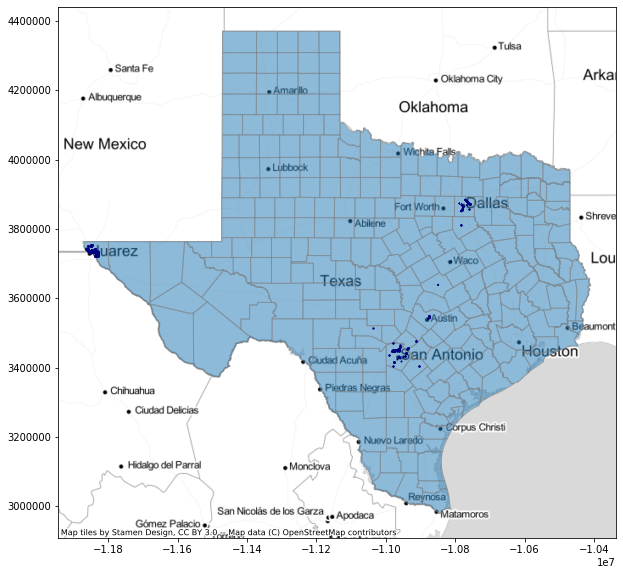

In [9]:
# plot work zone with admin boundary info
fig, ax = plt.subplots(figsize=(10,10))
texas_boundary.plot(ax=ax, color=None, edgecolor='gray', alpha=0.5)

for g, gdf in tx_gdf_boundary.groupby('geom_type'):
    ax = gdf.plot(ax=ax, color='navy', markersize=1)

base = ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
plt.show()

In [10]:
texas_boundary[texas_boundary['CNTY_NM'] == 'Bexar']

,FID,CMPTRL_CNTY_NBR,CNTY_NM,DPS_CNTY_NBR,FIPS_ST_CNTY_CD,TXDOT_CNTY_NBR,TXDOT_DIST_NBR,GID,SHAPE_Length,SHAPE_Area,geometry
6,7,15,Bexar,15,48029,15,15,41,2.729776,0.302846,"MULTIPOLYGON (((-10982583.682 3401191.936, -10..."


In [11]:
bexar_gdf = tx_gdf_boundary[tx_gdf_boundary['CNTY_NM'] == 'Bexar']
started = bexar_gdf['start_date'].apply(lambda x: dateutil.parser.parse(x[:16]) < datetime.today())

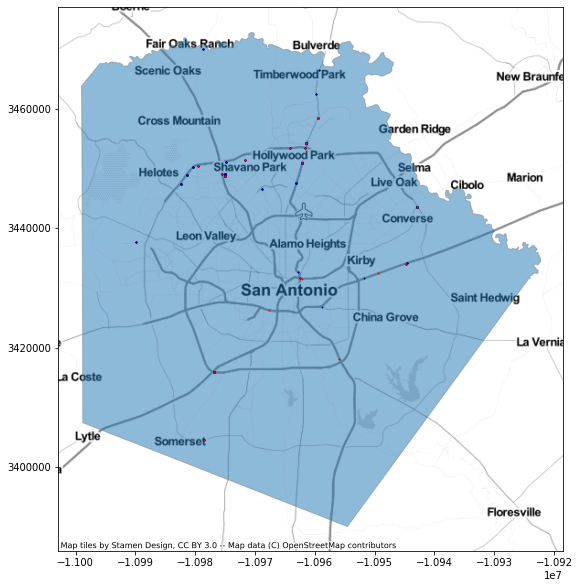

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
texas_boundary[texas_boundary['CNTY_NM'] == 'Bexar'].plot(
    ax=ax, color=None, edgecolor='gray', alpha=0.5)

for g, gdf in bexar_gdf[started==False].groupby('geom_type'):
    ax = gdf.plot(ax=ax, color='navy', markersize=1)
    
for g, gdf in bexar_gdf[started].groupby('geom_type'):
    ax = gdf.plot(ax=ax, color='red', markersize=1)

base = ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
plt.show()